In [1]:
# Execute if necessary
# %%capture
!pip install numpy seaborn statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 91.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 KB 38.3 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import seaborn as sns
from typing import List
import matplotlib.pyplot as plt

# Práctica 5: Introducción a  Modelos Autoregresivos y de Medias Móviles

__Instrucciones__: A continuación hay una lista de funciones que debe implementar o tareas que debe desarrollar. La descripción de cada una de ellas se encuentra en la definición de cada una de las funciones.

La entrega de la práctica será en la siguiente sesión a menos que la indicación sea otra. La revisión iniciará al iniciar la sesión y únicamente podrá ser evaluada durante la duración de la sesión.

## Asignación 1

Implementa la función descrita debajo para simular el proceso autoregresivo dado por

$$

X_t = \phi_1 X_{t-1} + \phi_2 X_{t-2} + \cdots + \phi_p X_{t-p} + W_t
$$
$$
= \sum_{i=1}^p \phi_iX_{t-i}+W_t
$$



In [3]:
def simulate_auto_regressive_process(
    parameters: List[float]=[0.9], 
    timesteps: int=100, 
    mean: float=0.,
    std: float=1.
    ):
    
    '''
    This function simulates an AR(p) processwith mean 0.
    
    Inputs:
        parameters: A list of the parameters phi used to compute the autoregression simulation.
                    The first parameter is associated with the time t-1, the second with t-2 and so on.
        timesteps: The number of timesteps to simulate. The first p values of the simulation must 
                    be set to zero (initial conditions).
        mean: The mean used to sample the white noise
        std: The standard deviation used to sample the white noise
    Output:
        The time series simulation
    '''
    # Initialize the simulation
    simulation = np.random.normal(mean, std, timesteps)

    # Compute the length of the parameters
    p = len(parameters)
    
    # Compute the simulation
    for t in range(p, timesteps):
        # Compute the value of the AR process at time t
        for i in range(p):
            simulation[t] += parameters[i] * simulation[t-i-1]

    return simulation

## Asignación 2

Grafique la simulación de la serie de tiempo del modelo autoregresivo con los parámetros indicados por el profesor. A la derecha de la serie de tiempo debe graficar el correlograma para el proceso simulado.

In [15]:
#Librerías 
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf

#Se establecen parámetros de manera arbitraria
par = [0.1, 0.3, 0.4, 0.6]
timesteps = 30

#Se llama la función y se almacena la serie de tiempo
simulation =  simulate_auto_regressive_process(par, timesteps)

#se convierte a dataframe el vector resultante de la dunción AR
simulation_df =  pd.DataFrame(simulation)

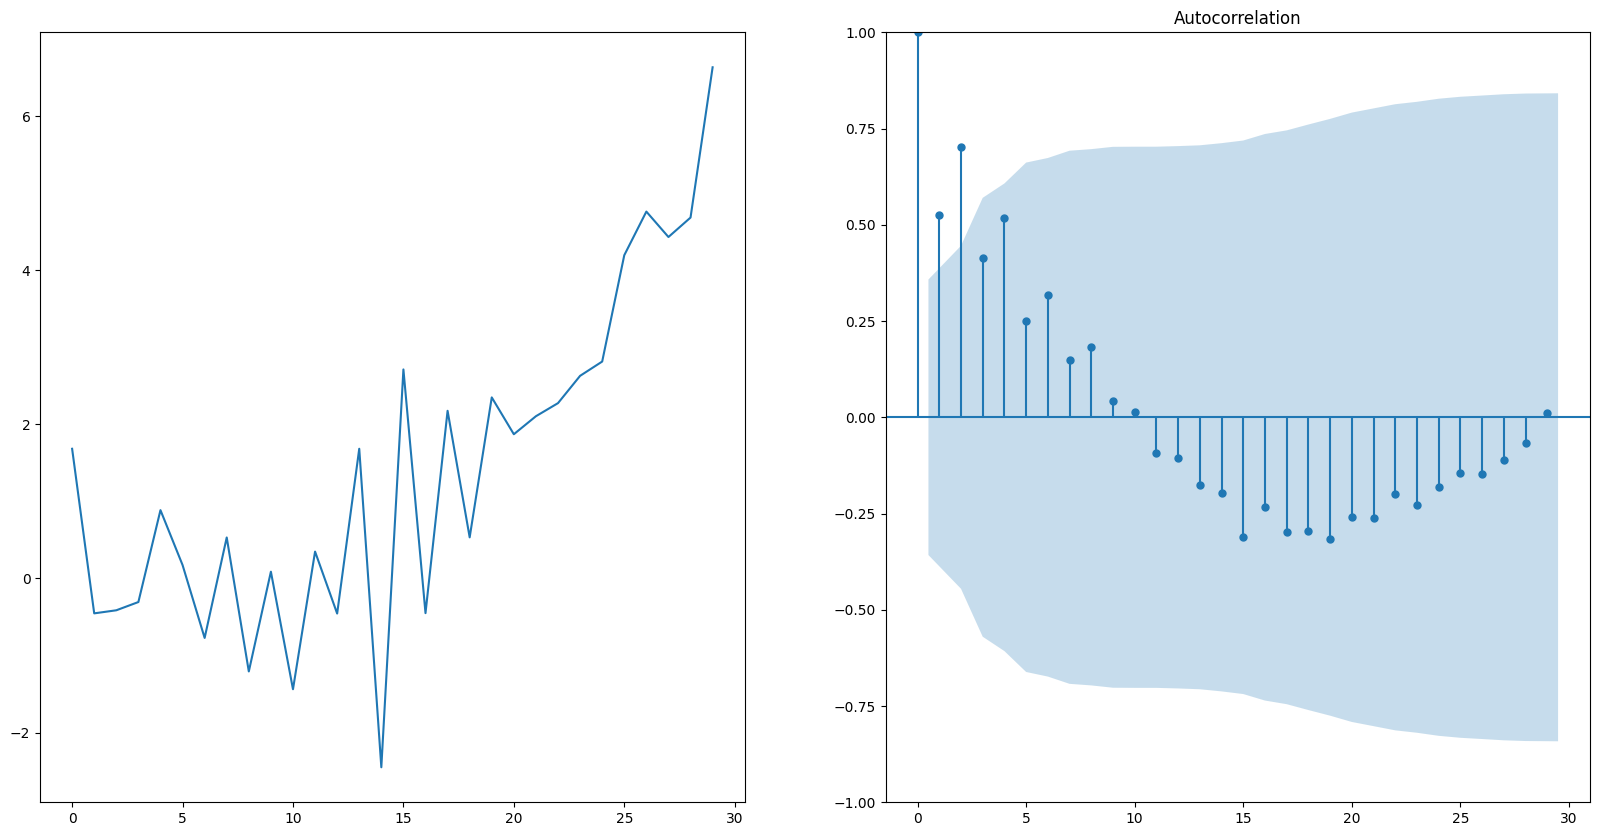

In [16]:
x = np.arange(timesteps)
y= simulation
fig, ax = plt.subplots(ncols = 2, squeeze=False, figsize=(20, 10)) 
ax[0, 0].plot(x,y)
plot_acf(simulation_df, lags=timesteps-1, ax = ax[0, 1] )
plt.show()

## Asignación 3

Implementa la función descrita debajo para simular el proceso de medias móviles dado 

$$
X_t = W_t + \theta_1 W_{t-1} + \theta_2 W_{t-2} + \cdots + \theta_q W_{t-q}
$$

In [17]:
def simulate_moving_averages_process(
    parameters: List[float], 
    timesteps: int, 
    mean: float,
    std: float,
    ):
    
    '''
    This function simulates an MA(q) process with mean 0.
    
    Inputs:
        parameters: A list of the parameters theta used to compute the moving averages simulation
        timesteps: The number of timesteps to simulate.
        mean: The mean used to sample the white noise
        std: The standard deviation used to sample the white noise
    Output:
        The time series simulation
    '''

    #Se crea una lista vacia para almacenar los valores de la serie de tiempo
    x = []
    #Se obtiene "q" mediante la longitud del arreglo de prametros, se le agrega 1 en la posición 0 para realizar el producto punto
    q = len(parameters) + 1
    parameters.insert(0, 1)

    #Se crean los primeros q ruidos blancos para iniciar los cálculos
    w = np.random.normal(mean, std, q)
    #print(w)
    #print(parameters)
    
    #En cada iteración del ciclo, se realiza el producto punto de los parametros con [Wt, Wt-q].
    for i in range(timesteps):
        x.append(np.dot(w[:q], parameters))
        #Se agrega un ruido blanco (Wt) para el cálculo del siguiente Xt en la siguiente iteración
        w = np.append(np.random.normal(mean, std, 1), w)
    
    #print(x)
    return x

In [22]:
#Se establecen parámetros de manera arbitraria
par = [0.5, 0.3, 0.8, 0.69]
timesteps = 100

#Se llama la función y se almacena la serie de tiempo
ts = simulate_moving_averages_process(par, timesteps, 0, 1)

## Asignación 4

Grafique la simulación de la serie de tiempode medias móviles con los parámetros indicados por el profesor. A la derecha de la serie de tiempo debe graficar el correlograma para el proceso simulado.

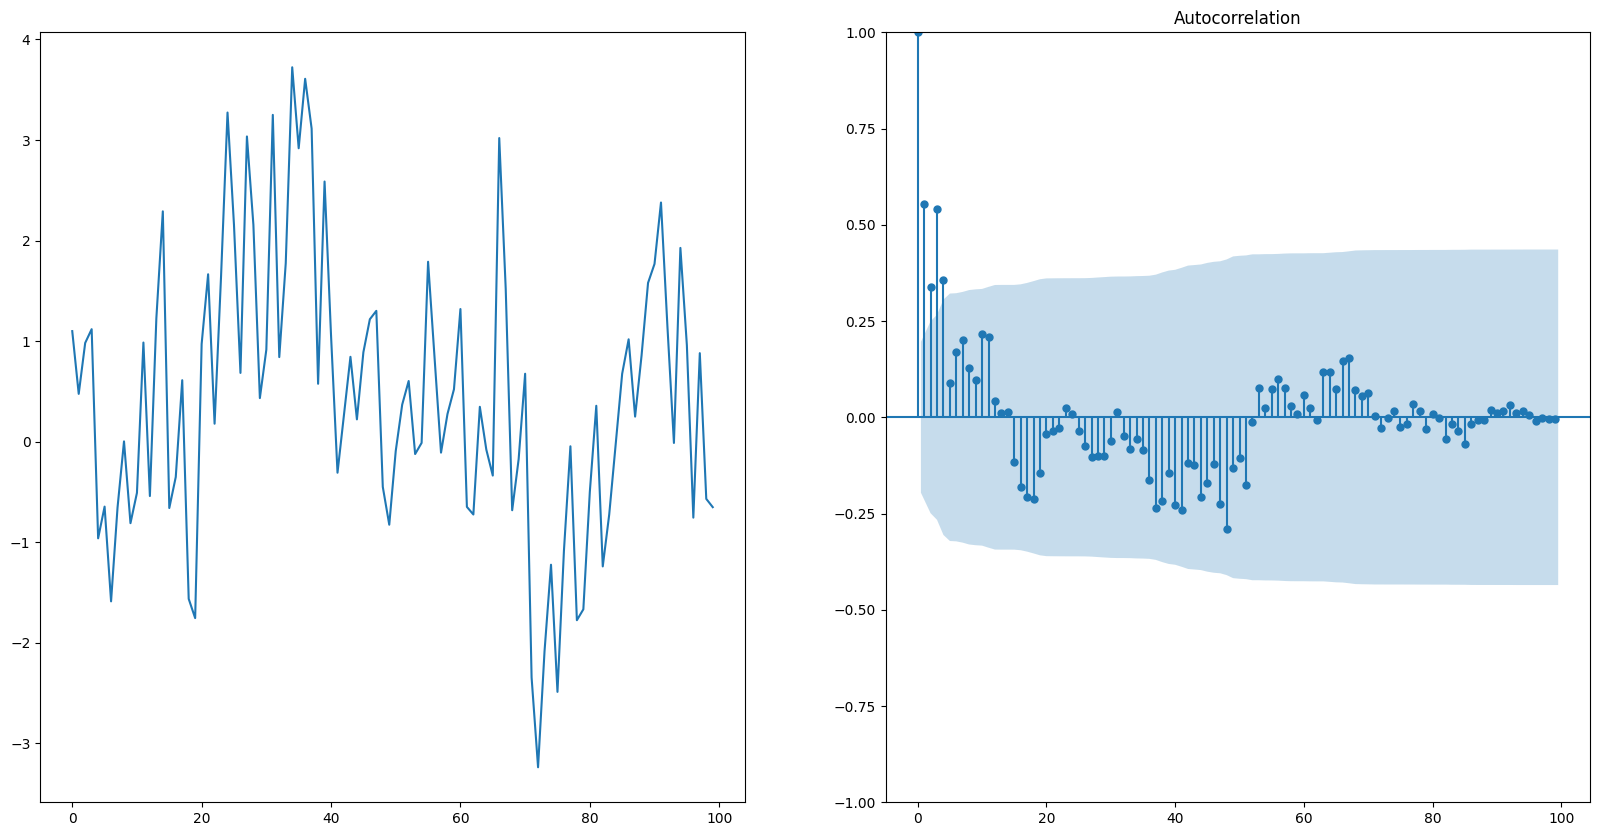

In [23]:
x = np.arange(timesteps)
y= simulation
fig, ax = plt.subplots(ncols = 2, squeeze=False, figsize=(20, 10)) 
ax[0, 0].plot(x,ts)
plot_acf(ts, lags=timesteps-1, ax = ax[0, 1] )
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=976388dc-3743-4700-b234-9b1adb253ded' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>